In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-stats/NBA_stats.csv


In [2]:
df = pd.read_csv("/kaggle/input/nba-stats/NBA_stats.csv")

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px


In [4]:
df['points_per_minutes'] = df['PTS']/df['Min']

In [5]:
df['Average 3 point success rate'] = df['3P%'].mean()

In [6]:
df['Average Field Goal success rate'] = df['FG%'].mean()

In [7]:
def calculate_rating(row):
    rating = 2 * row['W'] + row['PTS'] + 0.5 * row['AST'] + 0.2 * row['REB'] - 0.3 * row['TOV'] + 0.3 * row['STL'] + 2 * row['BLK']
    return rating

df['Overall_Rating'] = df.apply(calculate_rating, axis=1)

In [8]:
age_categories = ['<20', '20-25', '25-30', '30-35', '>35']

age_cat_type = pd.CategoricalDtype(categories=age_categories, ordered=True)

df['Age_Category'] = df['Age'].apply(lambda x: '<20' if x < 20 else ('20-25' if x < 25 else ('25-30' if x < 30 else ('30-35' if x < 35 else '>35'))))

df['Age_Category'] = df['Age_Category'].astype(age_cat_type)

In [9]:
def scatter(x_axis="Age",y_axis="Min"):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.scatterplot(x=x_axis, y=y_axis, data=df,ax=ax, hue='Age_Category')


In [10]:
def box_a(xaxis="Age", yaxis="Min"):
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.boxplot(data=df, x=xaxis , y=yaxis , ax=ax)

In [11]:
def dis_plot(xaxis="FG%"):
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.histplot(data=df, x=xaxis , bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],color=['black'] )
    ax.set_ylabel("Total Number")
    ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
    

In [12]:
def bar(y_axis="PTS" , Listbyrank='5'):
    df_sorted = df.sort_values(by=y_axis, ascending=False)
    
    if Listbyrank=="" or int(Listbyrank) < 1 :
        Listbyrank = '1'
        
    if int(Listbyrank) > 7:
        Listbyrank= '7'
        
    df_sorted = df_sorted.head(int(Listbyrank))
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.barplot(data=df_sorted, x='Player' , y=y_axis)
   

In [13]:
def line_chart(y_axis="PTS" , Listbyrank='5'):
    df_sorteddd = df.sort_values(by=y_axis, ascending=False)
    
    if Listbyrank=="" or int(Listbyrank) < 1 :
        Listbyrank = '1'
        
    if int(Listbyrank) > 7:
        Listbyrank= '7'
        
    df_sorteddd = df_sorteddd.head(int(Listbyrank))
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.lineplot(data=df_sorteddd, x='Player' , y=y_axis)

In [14]:
def wl_bar(Team="Player",number=5):
    
    df_sorted = df.sort_values("W", ascending=False)

    
    top_teams = df_sorted.head(number)

    
    top_teams.plot(x=Team, y=["W", "L"], kind="bar")

In [15]:
df_sortedd = df.sort_values('Overall_Rating', ascending=False)


top_6_players = df_sortedd.head(6).reset_index()
top_6_players["Overall_Rating"] = top_6_players["Overall_Rating"].astype(int)
top_6_players["Player_rating"] = top_6_players['Player'] +"-"+ top_6_players["Overall_Rating"].astype(str)
top_6_players =  top_6_players[["Player_rating",'W','PTS','AST','REB','TOV','STL','BLK']] 
top_6_players


,Player_rating,W,PTS,AST,REB,TOV,STL,BLK
0,Luka Doncic-1325,19,1076,280,278,120,54,18
1,Kevin Durant-1274,22,1016,182,235,120,27,52
2,Jayson Tatum-1238,24,1026,136,266,88,39,29
3,Shai Gilgeous-Alexander-1174,13,976,180,151,105,53,34
4,Giannis Antetokounmpo-1123,18,919,150,335,110,25,26
5,Nikola Jokic-1073,21,798,291,336,109,45,20


In [16]:

target_row_index = 7


plt.figure(figsize=plt.figaspect(1))

values = top_6_players.iloc[0, 1:]
values1 = top_6_players.iloc[1, 1:]
values2 = top_6_players.iloc[2, 1:]
values3 = top_6_players.iloc[3, 1:]
values4 = top_6_players.iloc[4, 1:]
values5 = top_6_players.iloc[5, 1:]
labels =top_6_players.columns[1:]



def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def make_autopct(values1):
    def my_autopct(pct):
        total = sum(values1)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def make_autopct(values2):
    def my_autopct(pct):
        total = sum(values2)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def make_autopct(values3):
    def my_autopct(pct):
        total = sum(values3)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def make_autopct(values4):
    def my_autopct(pct):
        total = sum(values4)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
def make_autopct(values5):
    def my_autopct(pct):
        total = sum(values5)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct





<Figure size 288x288 with 0 Axes>

In [17]:
_ = interact(scatter,
    y_axis= widgets.Dropdown(options=[("Minutes", "Min"), ("Points", "PTS")]),
             x_axis= widgets.Dropdown(options=[("Age", "Age"),("Age_Category","Age_Category"), ("Minutes", "Min"), ("Points", "PTS")])
        )

interactive(children=(Dropdown(description='x_axis', options=(('Age', 'Age'), ('Age_Category', 'Age_Category')…

In [18]:
_ = interact(box_a,
        xaxis= widgets.Dropdown(options=["Age","Age_Category"]),
             yaxis= widgets.Dropdown(options=[("Minutes", "Min"), ("Points", "PTS"), ("Overall Rating", "Overall_Rating"), ("Played Games", "GP"), ("Wins", "W"), ("Losses", "L"), ("Field Goals Made", "FGM"), ("Field Goals Attempted", "FGA"), ("Field Goal Percentage", "FG%"), ("3 Points Made", "3PM"), ("3 Points Attempted", "3PA"), ("3 Point Percentage", "3P%"), ("Free Throws Made", "FTM"), ("Free Throws Attempted", "FTA"), ("Free Throw Percentage", "FT%"), ("Offensive Rebounds", "OREB"), ("Defensive Rebounds", "DREB"), ("Total Rebounds", "REB"), ("Assists", "AST"), ("Turnovers", "TOV"), ("Steals", "STL"), ("Blocks", "BLK"), ("Personal Fouls", "PF"), ("Double Doubles", "DD2"), ("Triple Doubles", "TD3")])
        )

interactive(children=(Dropdown(description='xaxis', options=('Age', 'Age_Category'), value='Age'), Dropdown(de…

In [19]:
_ = interact(dis_plot,
             xaxis= widgets.Dropdown(options=[("3 Point Success Rate", "3P%"), ("Field Goal Success Rate", "FG%"),("Average 3 point success rate","Average 3 point success rate"),("Average Field Goal success rate","Average Field Goal success rate")]),
             )

interactive(children=(Dropdown(description='xaxis', options=(('3 Point Success Rate', '3P%'), ('Field Goal Suc…

In [20]:
_ = interact(bar,
             y_axis=widgets.Dropdown(
                 options = [("Points", "PTS"),("points_per_minutes","points_per_minutes"),("Overall_Rating","Overall_Rating")]
             ),
             
            )

interactive(children=(Dropdown(description='y_axis', options=(('Points', 'PTS'), ('points_per_minutes', 'point…

In [21]:
_ = interact(line_chart,
             y_axis=widgets.Dropdown(
                 options=[("Points", "PTS"), ("points_per_minutes", "points_per_minutes")]
             ),
            )

interactive(children=(Dropdown(description='y_axis', options=(('Points', 'PTS'), ('points_per_minutes', 'point…

In [22]:
_ = interact(wl_bar,
             Team=widgets.Dropdown(
                 options = ['Player','Team']
             ),
             number = widgets.IntSlider(
             value = 1,
             min=1,
                max=12 #number of len(tmp_x.columns)
             )
            )

interactive(children=(Dropdown(description='Team', options=('Player', 'Team'), value='Player'), IntSlider(valu…

Text(0.5, 1.0, '6th Player - Nikola Jokic-1073')

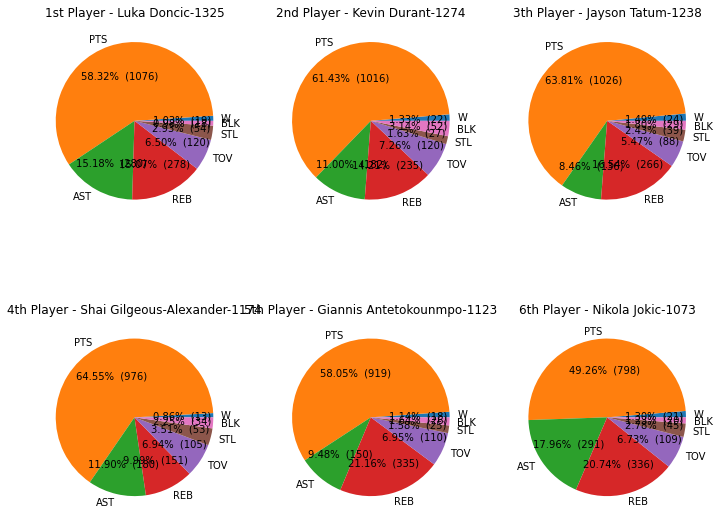

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
ax[0,0].pie(values, labels=labels, autopct=make_autopct(values))
ax[0,0].set_title('1st Player - Luka Doncic-1325')
ax[0,1].pie(values1, labels=labels, autopct=make_autopct(values1))
ax[0,1].set_title('2nd Player - Kevin Durant-1274')
ax[0,2].pie(values2, labels=labels, autopct=make_autopct(values2))
ax[0,2].set_title('3th Player - Jayson Tatum-1238')
ax[1,0].pie(values3, labels=labels, autopct=make_autopct(values3))
ax[1,0].set_title('4th Player - Shai Gilgeous-Alexander-1174')
ax[1,1].pie(values4, labels=labels, autopct=make_autopct(values4))
ax[1,1].set_title('5th Player - Giannis Antetokounmpo-1123')
ax[1,2].pie(values5, labels=labels, autopct=make_autopct(values5))
ax[1,2].set_title('6th Player - Nikola Jokic-1073')